In [1]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt

import seaborn as sns
import xgboost as xgb

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import resample
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, log_loss

In [2]:
df = pd.read_csv('data/titanic_data.csv')

In [3]:
df = df[["pclass","sex","age","survived"]]
df.dropna(inplace=True)

In [4]:
mapping = {"female": 0, "male": 1}
df["sex"] = df["sex"].map(mapping)

In [5]:
X_data = df[['pclass', 'sex', 'age']].values
y_data = df['survived'].values
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3)

In [6]:
df.head()

,pclass,sex,age,survived
0,3,1,22.0,0
1,1,0,38.0,1
2,3,0,26.0,1
3,1,0,35.0,1
4,3,1,35.0,0


In [7]:
features = df.columns

In [8]:
def accuracy(true_values, predictions):
    return np.mean(true_values == predictions)

Accuracy:  0.8325581395348837
Precision:  0.8311688311688312
Sensitivity / recall:  0.735632183908046


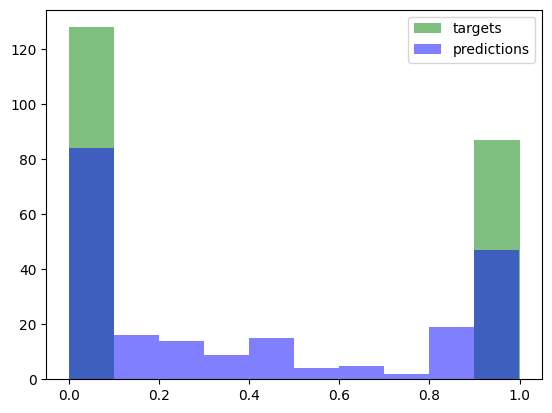

In [9]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Predict and evaluate model 
predictions = model.predict(X_test)
print("Accuracy: ", accuracy(y_test, predictions))
print("Precision: ", metrics.precision_score(y_test, predictions))
print("Sensitivity / recall: ", metrics.recall_score(y_test, predictions))

probs  = model.predict_proba(X_test)[:,1]

plt.hist(y_test, color="green", alpha=0.5, label="targets")
plt.hist(probs, color="blue", alpha=0.5, label="predictions")
plt.legend()
plt.show()

In [13]:
y_surr = model.predict(X_train)

In [14]:
surr_model = LogisticRegression()

In [17]:
surr_model.fit(X_train, y_surr)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [18]:
def niceprint(l):
    gender = "male" if l[1] == 1 else "female"
    print("Pclass\t|     Gender\t|\tAge\t|")
    print(f"{l[0]} \t|     {gender}\t|\t{l[2]}\t|")

In [19]:
X_paul = [2, 1, 25]
pred_paul = model.predict_proba([X_paul])
print("Paul:")
niceprint(X_paul)
print(f"Chance for survival: {pred_paul[0][1]}\n")

Paul:
Pclass	|     Gender	|	Age	|
2 	|     male	|	25	|
Chance for survival: 0.03118947334587574



In [20]:
X_paul = [2, 1, 25]
pred_paul = surr_model.predict_proba([X_paul])
print("Paul:")
niceprint(X_paul)
print(f"Chance for survival: {pred_paul[0][1]}\n")

Paul:
Pclass	|     Gender	|	Age	|
2 	|     male	|	25	|
Chance for survival: 0.1706765286950136

